МНК
Веса: w = 0.6000, b = 2.2000
Тест 1: Градиентный спуск с lr=0.01
Начальные веса: [0. 0.]

Итерация 1:
Предсказания: [0. 0. 0. 0. 0.]
Градиент: [-26.4  -8. ]
Веса до обновления: [0. 0.]
Веса после обновления: [0.264 0.08 ]
MSE: 17.2000

Итерация 2:
Предсказания: [0.34 0.61 0.87 1.14 1.4 ]
Градиент: [-20.112  -6.256]
Веса до обновления: [0.264 0.08 ]
Веса после обновления: [0.4651 0.1426]
MSE: 10.4902

Итерация 3:
Предсказания: [0.61 1.07 1.54 2.   2.47]
Градиент: [-15.312   -4.9242]
Веса до обновления: [0.4651 0.1426]
Веса после обновления: [0.6182 0.1918]
MSE: 6.5782
Финальные веса: w = 0.6177, b = 2.1361
Тест 2: Градиентный спуск с lr=0.001
Финальные веса: w = 0.6965, b = 1.8517

Сравнение

Аналитическое решение:
Предсказания: [2.8 3.4 4.  4.6 5.2]
MSE: 0.480000

Градиентный спуск (lr=0.01):
Предсказания: [2.7538 3.3715 3.9892 4.6069 5.2246]
MSE: 0.480743

Градиентный спуск (lr=0.001):
Предсказания: [2.5482 3.2447 3.9411 4.6376 5.3341]
MSE: 0.502077

Реальные значения: [2 4 5 4 5]

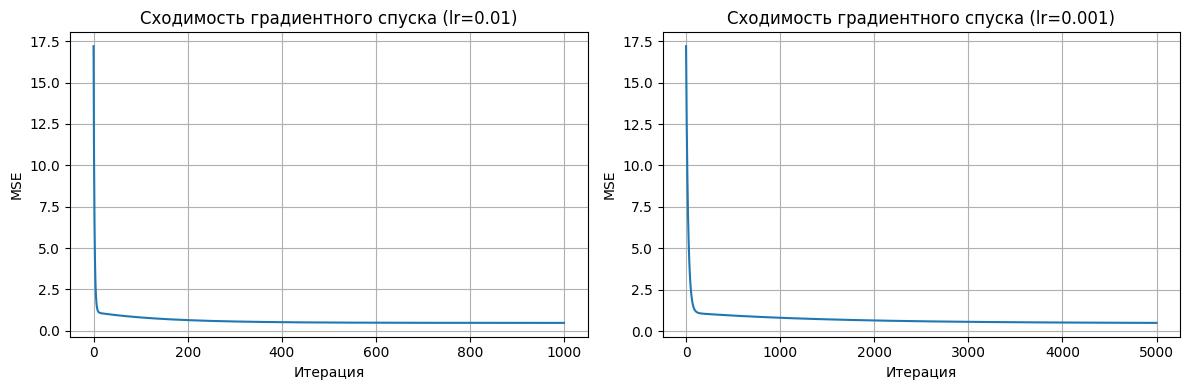

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

class MyLinearRegression:
    def __init__(self):
        self.w = None
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        return self
        
    def predict(self, X):
        l, n = X.shape
        X_train = np.hstack((X, np.ones((l, 1))))
        return X_train @ self.w


class MyGradientLinearRegression:
    def __init__(self):
        self.w = None
        self.losses = []

    def fit(self, X, y, lr=0.01, max_iter=1000, verbose=False):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))
        self.w = np.zeros((n + 1, 1)) 
        self.losses = []

        if verbose:
            print("Начальные веса:", self.w.flatten())
        
        for iter_num in range(max_iter):
            y_pred = X_train @ self.w
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
            
            grad = (2. / X.shape[0]) * (X_train.T @ (y_pred - y))
            
            if verbose and iter_num < 3:
                print(f"\nИтерация {iter_num + 1}:")
                print(f"Предсказания: {y_pred.flatten().round(2)}")
                print(f"Градиент: {grad.flatten().round(4)}")
                print(f"Веса до обновления: {self.w.flatten().round(4)}")
            
            self.w -= lr * grad
            
            if verbose and iter_num < 3:
                print(f"Веса после обновления: {self.w.flatten().round(4)}")
                print(f"MSE: {loss:.4f}")
                
            # Ранняя остановка при малом изменении loss
            if iter_num > 10 and abs(self.losses[-1] - self.losses[-2]) < 1e-6:
                if verbose:
                    print(f"\nРанняя остановка на итерации {iter_num}")
                break

        return self

    def predict(self, X):
        l, n = X.shape
        X_train = np.hstack((X, np.ones((l, 1))))
        return X_train @ self.w


X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

print("МНК")
model_analytical = MyLinearRegression()
model_analytical.fit(X, y)
analytical_weights = model_analytical.w
print(f"Веса: w = {analytical_weights[0][0]:.4f}, b = {analytical_weights[1][0]:.4f}")

print("Тест 1: Градиентный спуск с lr=0.01")
model_gradient = MyGradientLinearRegression()
model_gradient.fit(X, y, lr=0.01, max_iter=1000, verbose=True)
print(f"Финальные веса: w = {model_gradient.w[0][0]:.4f}, b = {model_gradient.w[1][0]:.4f}")

print("Тест 2: Градиентный спуск с lr=0.001")
model_gradient2 = MyGradientLinearRegression()
model_gradient2.fit(X, y, lr=0.001, max_iter=5000, verbose=False)
print(f"Финальные веса: w = {model_gradient2.w[0][0]:.4f}, b = {model_gradient2.w[1][0]:.4f}")

print("\nСравнение")
y_pred_analytical = model_analytical.predict(X)
y_pred_gradient = model_gradient.predict(X)
y_pred_gradient2 = model_gradient2.predict(X)

print("\nАналитическое решение:")
print(f"Предсказания: {y_pred_analytical.flatten().round(4)}")
print(f"MSE: {mean_squared_error(y, y_pred_analytical):.6f}")

print("\nГрадиентный спуск (lr=0.01):")
print(f"Предсказания: {y_pred_gradient.flatten().round(4)}")
print(f"MSE: {mean_squared_error(y, y_pred_gradient):.6f}")

print("\nГрадиентный спуск (lr=0.001):")
print(f"Предсказания: {y_pred_gradient2.flatten().round(4)}")
print(f"MSE: {mean_squared_error(y, y_pred_gradient2):.6f}")

print("\nРеальные значения:", y)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_gradient.losses)
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Сходимость градиентного спуска (lr=0.01)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_gradient2.losses)
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Сходимость градиентного спуска (lr=0.001)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [4]:
class MyLinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2 # проверяем, что X - матрица и y - вектор
        assert X.shape[0] == y.shape[0] # количество примеров в данных должно совпадать

        y = y[:, np.newaxis] # вектор в столбец (из (n,) в (n,1))
        l, n = X.shape # l (количество примеров), n (количество признаков)

        X_train = np.hstack((X, np.ones((l, 1)))) # добавляем фиктивный признак 1 для свободного члена

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y # для аналитического решения МНК

        return self

    def predict(self, X):
        # принимает на вход X и возвращает ответы модели
        # фиктивный признак равный 1
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w.copy() # для избежания модификации весов

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
def linear_expression(x):
    return 4 * x + 6

In [8]:
# по признакам сгенерируем значения таргетов с некоторым шумом
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

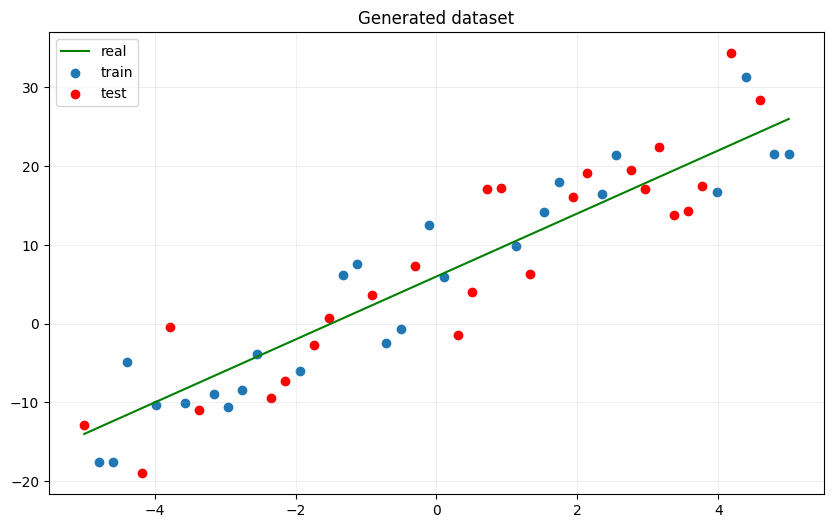

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(X, linear_expression(X), label='real', c = 'green')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test', c = 'red')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [10]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train) # делаем из X матрицу размера l на 1 тк в класс можно передать только двумерный объект

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([[4.22946323],
       [5.91846256]])

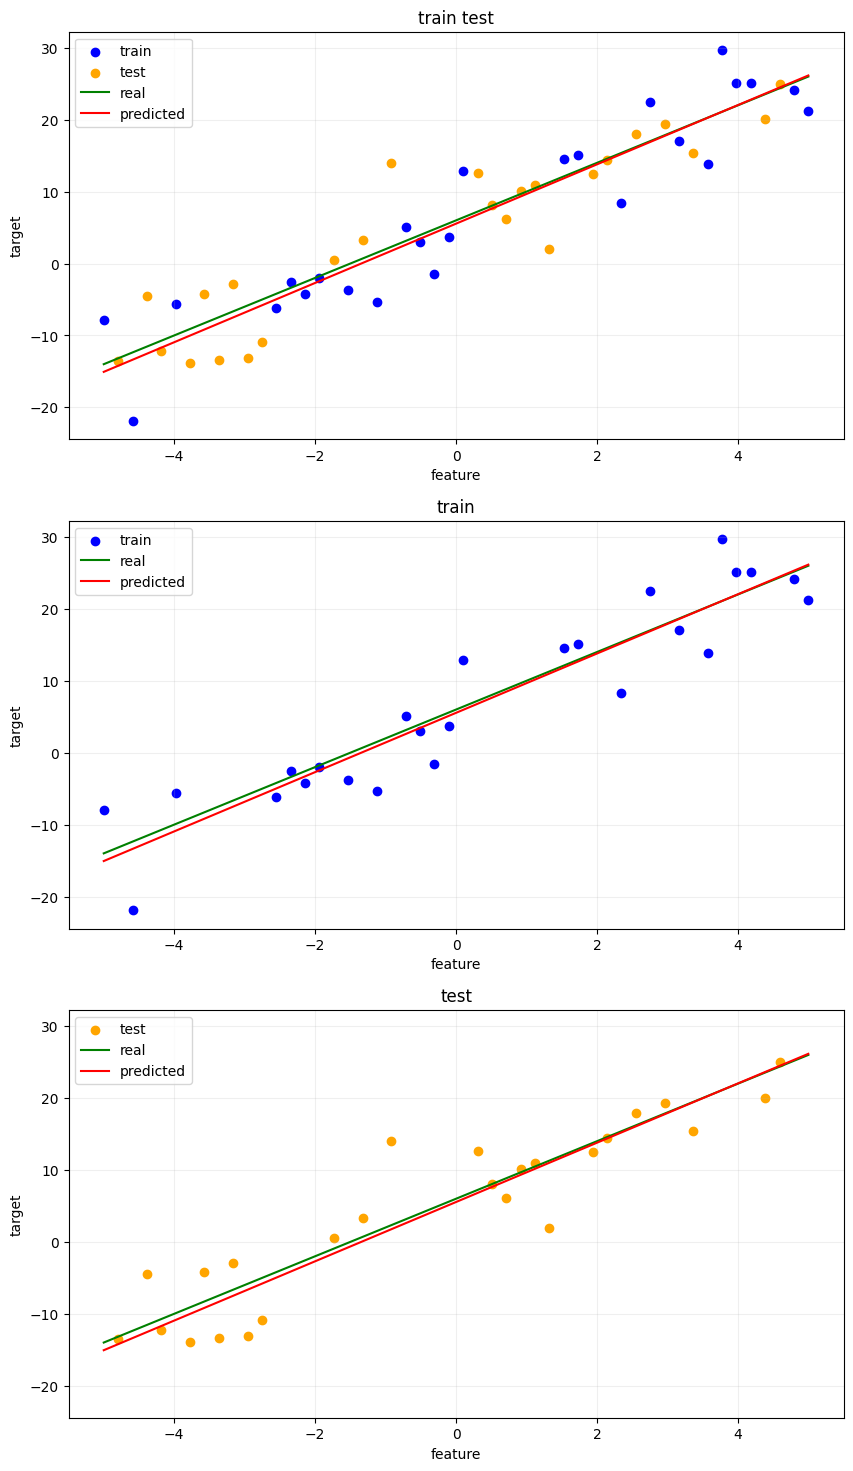

In [39]:
plt.figure(figsize=(10, 18))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(3, 1, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

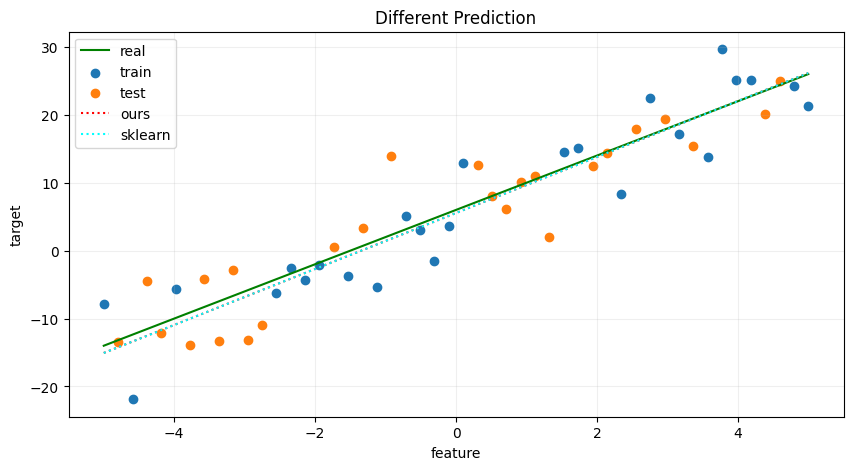

In [40]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='ours', c='r', linestyle=':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')

plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [41]:
sk_reg.coef_, sk_reg.intercept_

(array([4.12212663]), np.float64(5.544212049652629))

In [42]:
from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  21.67719164417314
Test MSE:  21.686395650407512


In [43]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору

    def fit(self, X, y, lr=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape

        # Добавляем признак из единиц
        X_train = np.hstack((X, np.ones((l, 1))))  # [l, n+1]

        self.w = np.random.randn(n + 1, 1) # инициализация случайных весов

        self.losses = []

        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y, y_pred))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, \
            f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"

            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = (2. / X.shape[0]) * (X.T @ (y_pred - y))

        return grad

    def get_losses(self):
        return self.losses

In [44]:
regressor = MyGradientLinearRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses() # .get_losses() возвращает историю значений MSE

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

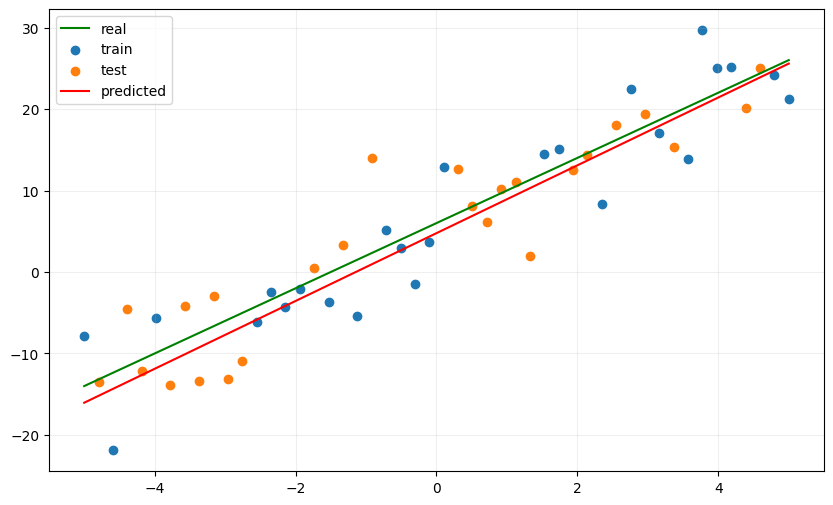

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

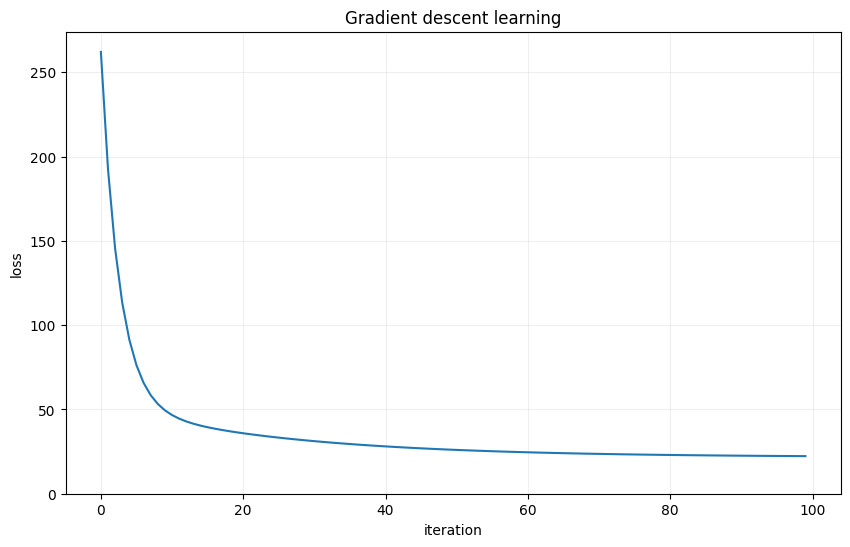

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

Когда мы использовали градиентный спуск, нам приходилось считать функцию потерь на всей обучающей выборке на каждой итерации.

Если выборка будет большой, то для каждой итерации считать функцию потерь по всем элементам и усреднять --- дорого. 

Поэтому в стохастическом градиентном спуске мы будем случайно выбирать батч и по нему вычислять градиент.

1. Мы можем на каждой итерации выбирать случайный батч --- тогда рано или поздно алгоритм сойдется к оптимальному весу.
2. Можно разделить обучение на эпохи: на каждой эпохе мы перемешиваем выборку и делим ее на несколько частей.

In [48]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        # Главное отличие в SGD -- это использование подвыборки для шага оптимизации
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        grad = 2 / self.n_sample * X[inds].T @ (y_pred[inds] - y[inds])

        return grad

In [49]:
regressor = MySGDLinearRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

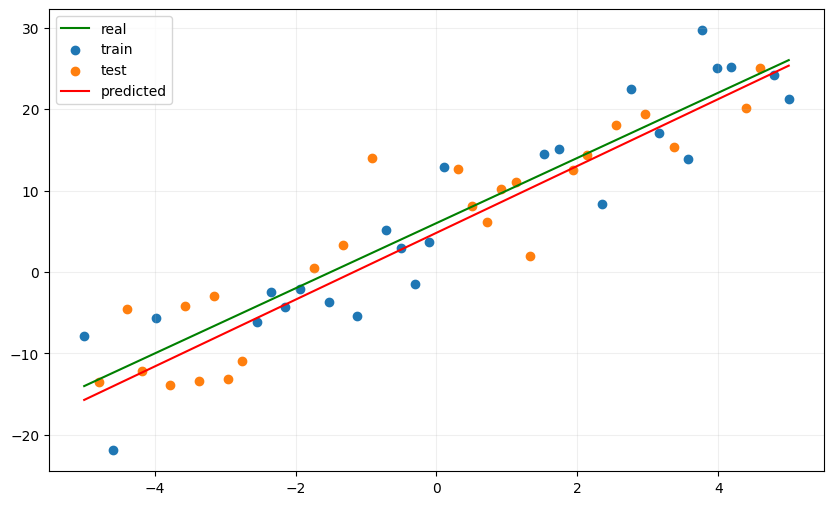

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

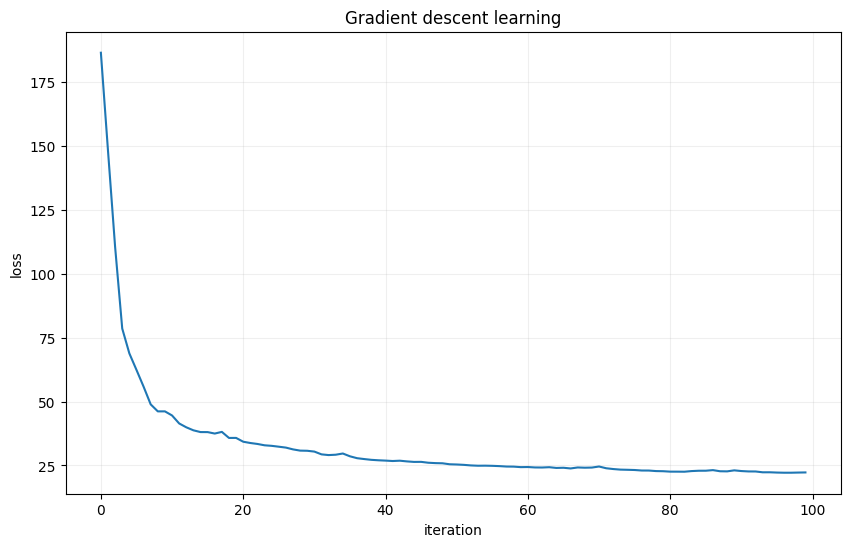

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

In [52]:
n_samples = [1, 4, 16]

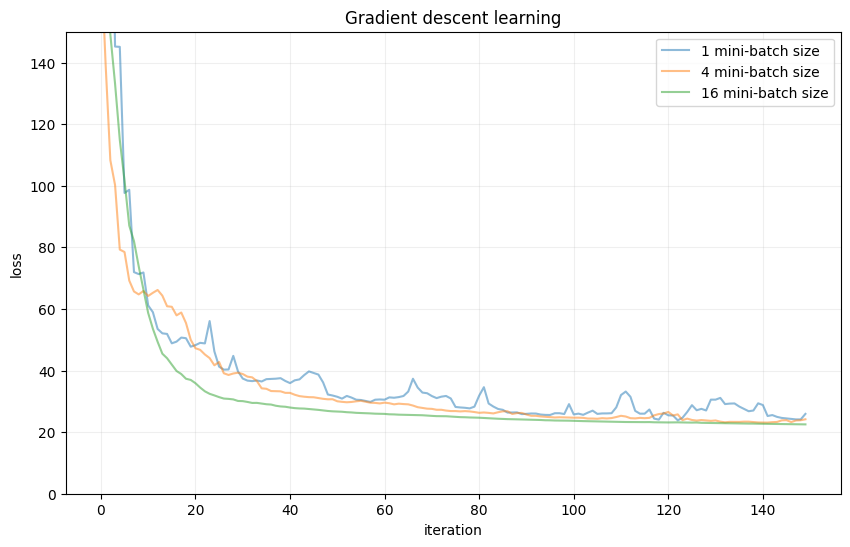

In [53]:
plt.figure(figsize=(10, 6))

for ns in n_samples:
    l = MySGDLinearRegression(n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()